# Creating a Neural Network from scratch
The Neural Network consists of a input and output layers consisting of 2 neurons and a single hidden layer with 3 neurons

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [11]:
# X - > Inputs and Y -> Expected outputs
x, y = sklearn.datasets.make_moons(200, noise=0.15) # 200 samples with 15% noise

In [6]:
x

array([[ 4.19943090e-01, -3.14575952e-01],
       [-9.97986676e-01,  6.34239197e-02],
       [ 2.01332353e-03,  4.36576080e-01],
       [ 1.80527026e+00, -9.29079291e-02],
       [ 6.30552667e-01,  7.76146464e-01],
       [ 6.54860734e-01,  7.55749574e-01],
       [ 5.55933387e-01, -3.95993774e-01],
       [ 5.84584987e-01, -4.09631995e-01],
       [-6.05609687e-01,  7.95761841e-01],
       [ 9.67948701e-01,  2.51147987e-01],
       [-1.42314838e-01,  9.89821442e-01],
       [ 0.00000000e+00,  5.00000000e-01],
       [ 1.70147489e+00, -2.12694171e-01],
       [ 2.33955557e-01, -1.42787610e-01],
       [ 1.00000000e+00,  0.00000000e+00],
       [-9.39692621e-01,  3.42020143e-01],
       [ 5.27225468e-01,  8.49725430e-01],
       [-3.27067963e-01,  9.45000819e-01],
       [ 1.99798668e+00,  4.36576080e-01],
       [ 9.28367933e-01,  3.71662456e-01],
       [ 1.67850941e+00, -2.34591709e-01],
       [ 1.95007112e+00,  1.87966554e-01],
       [ 1.76323419e-01, -6.70598639e-02],
       [ 1.

In [7]:
y

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0], dtype=int64)

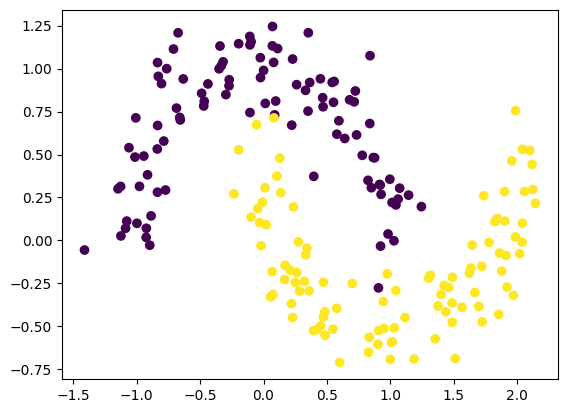

In [12]:
# Syntax: plt.scatter(inputs(first feature), inputs(second feature), color)
plt.scatter(x[:, 0], x[:, 1], c=y)

In [16]:
print(x.shape) #200 samples with 2 features
print(y.shape) #200 samples with 1 output

(200, 2)
(200,)


<div style="text-align:center;"><img src="./Images/scratch_nn.png"></div>

# Input Layer matrix
200 samples with 2 features each like given below

<pre>
            Feature 1       Feature 2
Sample 1    0.6             0.5         
Sample 2    0.9             0.4
.
.
.
Sample 200  0.1             0.01
</pre>


# Input to Hidden layer weights

<pre>
            Output1         Output2         Output3
Input1      <span style="color:red;">w1              w2              w3</span>
Input2      <span style="color:green;">w4              w5              w6</span>

</pre>

Dot Product => 200x2 (input matrix) * 2x3 (weight matrix) = 200x3 (input to next layer)

Dot Product => 200x3 (hidden layer) * 3x2 (weight matrix) = 200x2 (output layer)

In [20]:
# Declaring Hyperparameters
input_neurons = 2
output_neurons = 2
samples = x.shape[0]
learning_rate = 0.001
lambda_param = 0.01